## Proyecto Computacional 2

###  Curso: Procesamiento, Análisis, Codificación y Seguridad de Imágenes Digitales

###   Profesor: Manuel Quispe

Primero, se va a importar las librerías necesarias para realizar el procesamiento de imágenes con Python, para este caso se utilizará numpy, matplotlib y openCV para la adquisición de imágenes. Además, se deja comentado la instrucción para la instalación de la librería openCV en caso no se cuente con ese paquete instalado. 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#!pip install opencv-python
import cv2

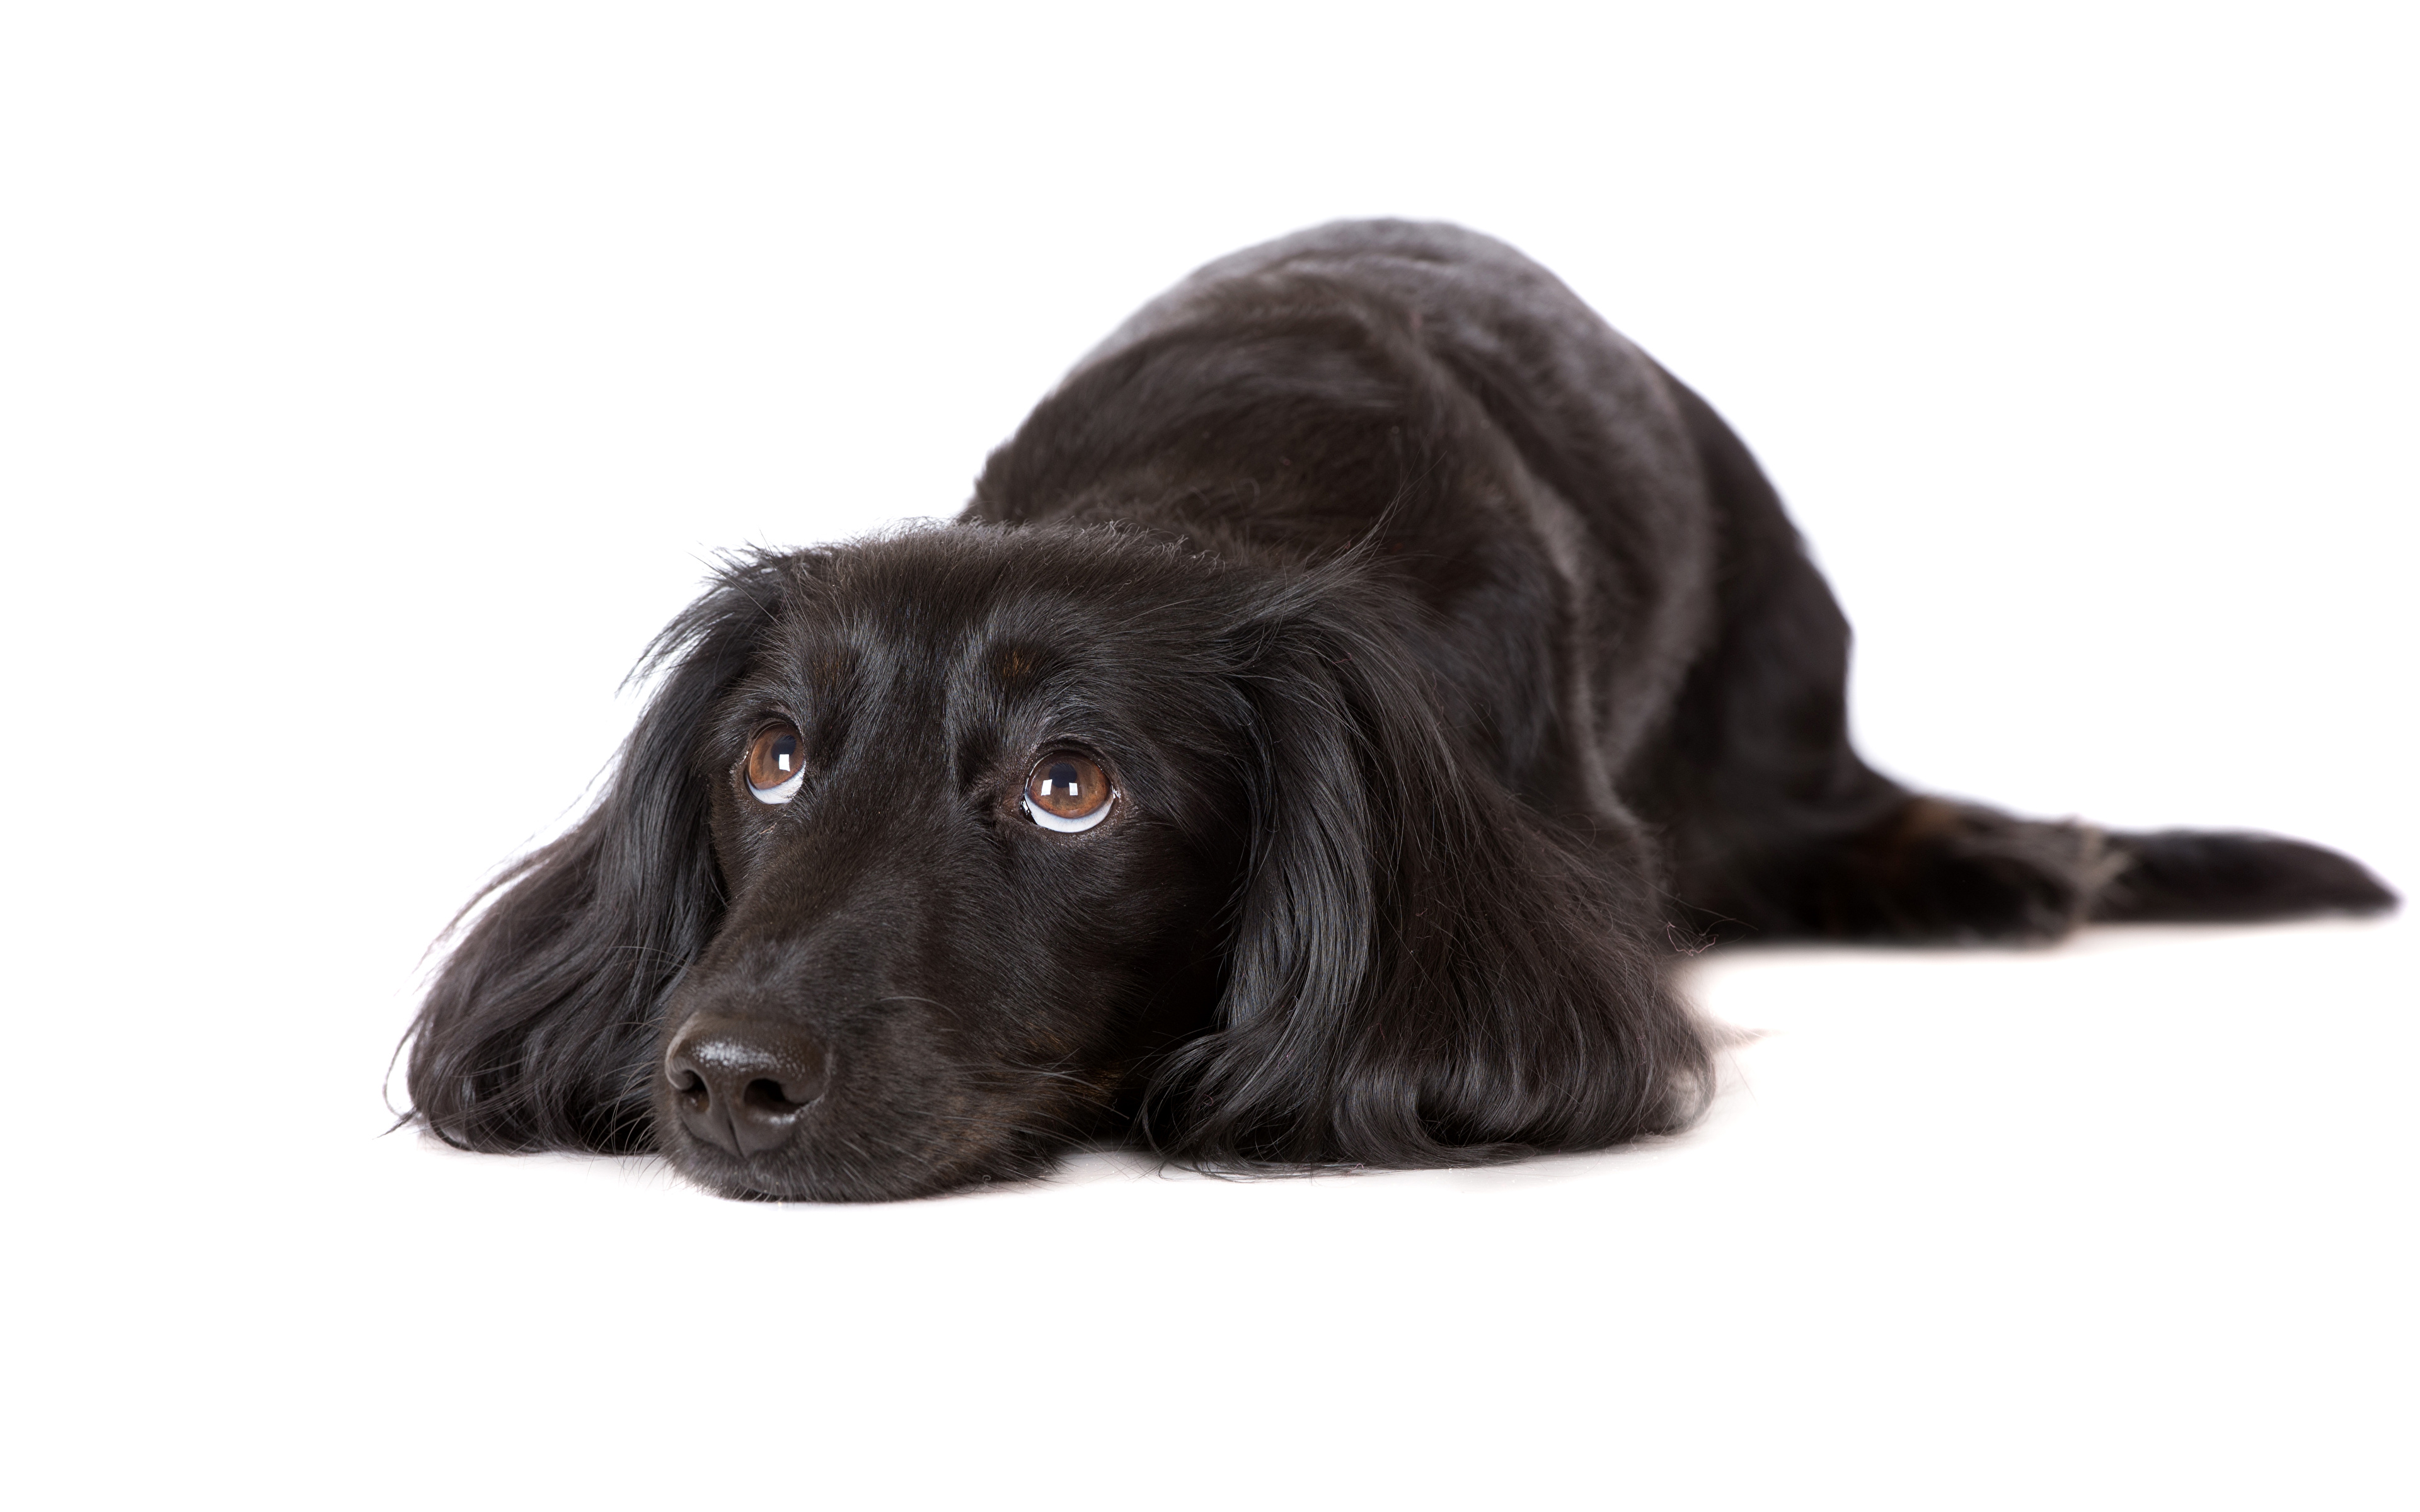

A continuación, se requiere de una imagen sobre la cual realizar el procesamiento, para el caso del proyecto asignado se utilizará la imagen siguiente: 

Se procede a leer la imagen con la ayuda de la librería openCV.

In [2]:
IMG = cv2.imread('Dog.jpg')

alto, ancho = IMG.shape[:2]
escala = 0.1
nuevo_alto = int (alto * escala)
nuevo_ancho = int (ancho * escala)

img = cv2.resize(IMG, (nuevo_ancho, nuevo_alto))

Ahora, se procede con la impresión en pantalla de la imagen adquirida.

## Imagen en escala de Grises

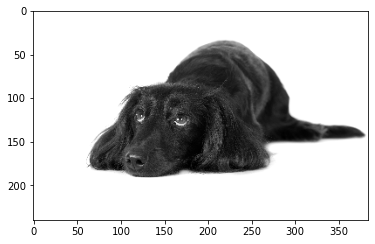

In [3]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray,cmap="gray")

En este punto, ya se cuenta con las librerías e imagenes necesarias para iniciar con el procesamiento de imágenes.

### Se implementa una funcion OpMorph que hará un barrido sobre la matriz para realizar Operaciones Morfológicas.

Para realizar este punto se procede a definir una función que permita hacer la convolución sobre toda la imagen.

In [4]:
def opmorfologica(img, tipo, veces = 1):
    if tipo == 'dilatacion':
        status = 0
    elif tipo == 'erosion':
        status = 1
    elif tipo == 'cerradura':
        status = 2
    elif tipo == 'apertura':
        status = 3
    
    length = img.shape[0]
    height = img.shape[1]
    
    imgBorde = np.zeros((length+2, height+2))
    
    # Aquí ya se cuenta con la imagen con el tipo de borde deseado (ceros o unos)
    imgBorde[1:1+length, 1:1+height] = img
    
    
    # Se inicializa la matriz resultante de la convolución con ceros
    result = np.zeros((length, height))
    
    if status == 0:
        for repeticiones in range(veces):
            for i in range(length):
                for j in range(height):
                    aux = np.any(imgBorde[i:i+3,j:j+3])  
                    result[i][j] = aux

    elif status == 1:
        for repeticiones in range(veces):
            for i in range(length):
                for j in range(height):
                    aux = np.all(imgBorde[i:i+3,j:j+3])  
                    result[i][j] = aux
                
    elif status == 2:
        aux = opmorfologica(img,'dilatacion', veces)
        aux = opmorfologica(aux,'erosion', veces)
        result = aux
        
    elif status == 3:
        aux = opmorfologica(img,'erosion', veces)    
        aux = opmorfologica(aux,'dilatacion', veces)
        result = aux
    return result

### Umbralización:

Se umbraliza la imagen para poder aplicar las operaciones morfológicas:

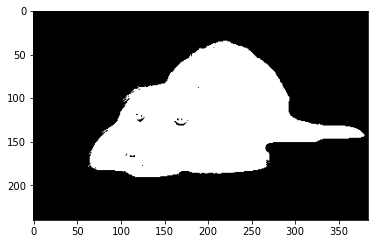

In [5]:
imgUmbralizada = imgGray < 150
plt.imshow(imgUmbralizada,cmap="gray")

### Dilatación:

La imagen binarizada se dilata 10 veces para acentuar la diferencia.

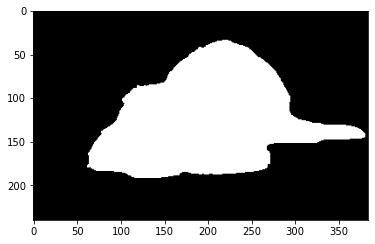

In [6]:
imgDilatada = opmorfologica(imgUmbralizada,'dilatacion',10)
plt.imshow(imgDilatada,cmap="gray")

### Erosión:

La imagen binarizada se erosiona 10 veces para acentuar la diferencia.

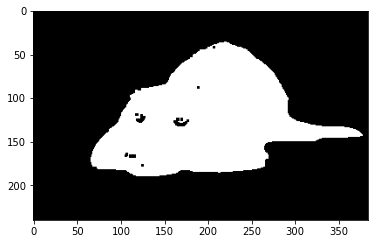

In [7]:
imgErosionada = opmorfologica(imgUmbralizada,'erosion',10)
plt.imshow(imgErosionada,cmap="gray")

### Apertura:

La operación morfológica de Apertura u Opening es una erosión seguida de una dilatación.
Se realiza esta operación 10 veces para notar la diferencia. 

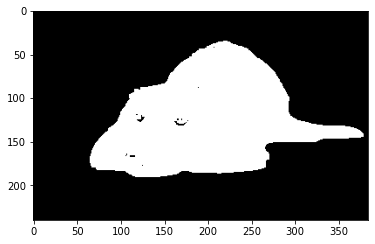

In [8]:
imgAbierta = opmorfologica(imgUmbralizada,'apertura', 10)
plt.imshow(imgAbierta, cmap="gray")

### Cerradura:

La operación morfológica de Cerradura o Closing es una dilatación seguida de una erosión.
Se realiza esta operación 10 veces para notar la diferencia. 

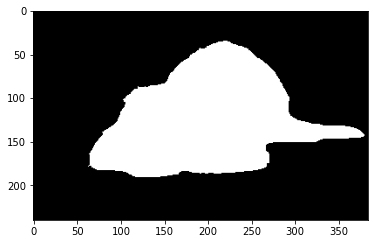

In [9]:
imgCerrada = opmorfologica(imgUmbralizada,'cerradura', 10)
plt.imshow(imgCerrada, cmap="gray")

### Detección de bordes:

Para la detección de bordes se realizará una substracción de la imagen cerrada menos la erosión de la misma (imagen cerrada), esto con la finalidad de obtener el borde general de la imagen.

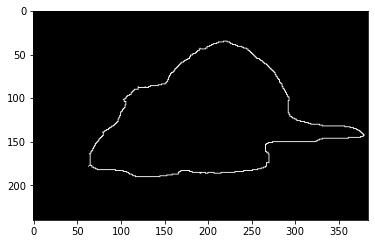

In [10]:
imgCerradaErosionada = opmorfologica(imgCerrada, 'erosion')
imgBorde = imgCerrada - imgCerradaErosionada
plt.imshow(abs(imgBorde), cmap="gray")

### Operaciones morfologicas en escala de grises

In [11]:
def opmorfologicaGris(img, tipo, bias, veces = 1):
    if tipo == 'dilatacion':
        status = 0
    elif tipo == 'erosion':
        status = 1
    elif tipo == 'cerradura':
        status = 2
    elif tipo == 'apertura':
        status = 3
    
    length = img.shape[0]
    height = img.shape[1]
    
    imgBorde = np.zeros((length+2, height+2))
    
    # Aquí ya se cuenta con la imagen con el tipo de borde deseado (ceros o unos)
    imgBorde[1:1+length, 1:1+height] = img
    
    
    # Se inicializa la matriz resultante de la convolución con ceros
    result = np.zeros((length, height))
    
    if status == 0:
        for repeticiones in range(veces):
            for i in range(length):
                for j in range(height):
                    aux = [imgBorde[i-1,j], imgBorde[i,j], imgBorde[i+1, j], imgBorde[i, j-1], imgBorde[i, j+1]]
                    aux = aux - bias*np.ones(len(aux))
                    aux = min(aux)
                    result[i][j] = aux

    elif status == 1:
        for repeticiones in range(veces):
            for i in range(length):
                for j in range(height):
                    aux = [imgBorde[i-1,j], imgBorde[i,j], imgBorde[i+1, j], imgBorde[i, j-1], imgBorde[i, j+1]]
                    aux = aux + bias*np.ones(len(aux))
                    aux = max(aux)
                    result[i][j] = aux
                
    elif status == 2:
        aux = opmorfologicaGris(img,'dilatacion', bias, veces)
        aux = opmorfologicaGris(aux,'erosion', bias, veces)
        result = aux
        
    elif status == 3:
        aux = opmorfologicaGris(img,'erosion', bias, veces)    
        aux = opmorfologicaGris(aux,'dilatacion', bias, veces)
        result = aux
    return result

### Dilatación:

La imagen en escala de grises se dilata (con una suma de 15 y un kernel de cruz) 10 veces para acentuar la diferencia.



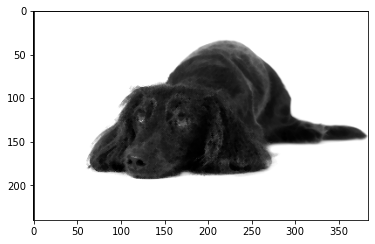

In [12]:
imgGrayDilatada = opmorfologicaGris(imgGray,'dilatacion',15,10)
plt.imshow(imgGrayDilatada,cmap="gray")

### Erosión:
La imagen en escala de grises se erosiona (con una resta 15 y un kernel de cruz) 10 veces para acentuar la diferencia

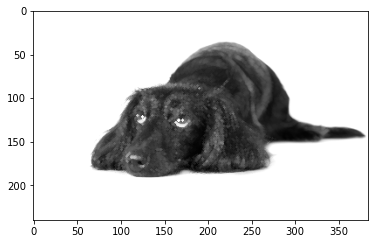

In [13]:
imgGrayErosionada = opmorfologicaGris(imgGray,'erosion',15,10)
plt.imshow(imgGrayErosionada,cmap="gray")

### Apertura:
La operación morfológica de Apertura u Opening es una erosión seguida de una dilatación. Se realiza esta operación con un paramero de 15 unidades de intensidad y 10 veces para notar la diferencia.

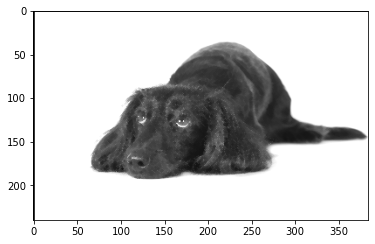

In [14]:
imgGrayAbierta = opmorfologicaGris(imgGray,'apertura',20,10)
plt.imshow(imgGrayAbierta,cmap="gray")

### Cerradura:
La operación morfológica de Cerradura o Closing es una dilatación seguida de una erosión. Se realiza esta operación con un paramero de 15 unidades de intensidad y 10 veces para notar la diferencia.

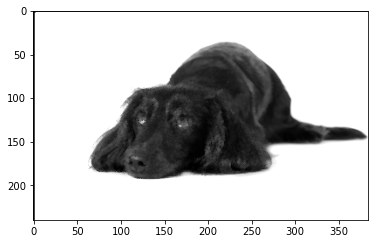

In [15]:
imgGrayCerrada = opmorfologicaGris(imgGray,'cerradura',20,10)
plt.imshow(imgGrayCerrada,cmap="gray")

### Detección de bordes mediante Morfología:
Para la detección de bordes se realizará una substracción de la imagen dilatada menos la imagen erosionada de la misma, esto con la finalidad de obtener los bordes de la imagen.

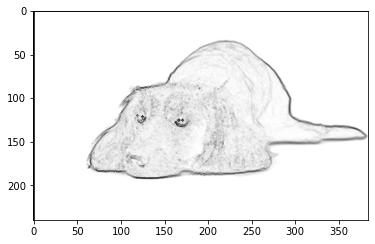

In [16]:
imgGrayBordeMorf = opmorfologicaGris(imgGray,'dilatacion',10) - opmorfologicaGris(imgGray,'erosion',10)
plt.imshow(imgGrayBordeMorf, cmap="gray")

# Declaración de la función laplaciano:

La funcion laplaciano tiene como entradas: <br>
img = imagen base en escala de grises <br>
tipo = 0 ( kernel = [0,1,0],[1,-4,1],[0,1,0] ) <br>
tipo = 1 ( kernel = [1,1,1],[1,-8,1],[1,1,1] ) <br>
veces = Opcional, es la cantidad de repeticiones de la función. Por defecto = 1.

Además, indicar que el tipo 1 es util para detectar las esquinas con mayor precisión.

In [17]:
def laplaciano(img, tipo, veces = 1):
    length = img.shape[0]
    height = img.shape[1]
    
    imgBorde = np.zeros((length+2, height+2))
    
    # Aquí ya se cuenta con la imagen con el tipo de borde 0
    imgBorde[1:1+length, 1:1+height] = img
    
    
    # Se inicializa la matriz resultante de la convolución con ceros
    result = np.zeros((length, height))
    
    if tipo == 0:
        kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    elif tipo == 1:
        kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])

    for repeticiones in range(veces):
        for i in range(length):
            for j in range(height):
                aux = imgBorde[i:i+3,j:j+3] * kernel
                aux = np.sum(aux)
                if aux < 0:
                    aux = 0
                elif aux > 255:
                    aux = 255
                result[i][j] = aux

    return result

### Detección de bordes mediante el filtro Laplaciano:

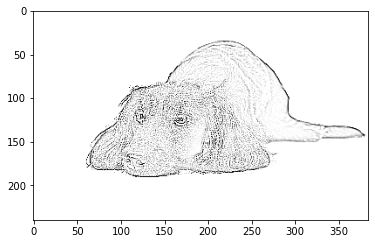

In [18]:
imgGrayBordeLapl = 255*np.ones(imgGray.shape) - laplaciano(imgGray, 1)
plt.imshow(imgGrayBordeLapl, cmap="gray")

## Analisis de la detección de bordes Morfológico vs Laplaciano:
Por un lado, el método Morfológico utiliza operaciones como dilatación y erosiópn para detectar los bordes, lo que lo hace menos sensible al ruido y puede producir bordes más precisos. Sin embargo, el método morfológico pierde precisión al detectar las esquinas. <br>

Por otro lado, el método Laplaciano utiliza operadores laplacianos mediante kernels, esto hace que pueda detectar cambios de intensidad en los pixeles, ejecutando efectivamente una gradiente. Por ello, este método es particularmente sensible a los cambios de intensidad de los pixeles y al ruido en la imagen, pudiendo producir bordes falsos. 

# Implementar Compresión Run-length encoding (RLE) para una imagen binaria y escala grises



### Declaramos la funcion RLE:

In [19]:
def rle(img):
    length = img.shape[0]
    height = img.shape[1]
    
    result = []
    anterior = 0
    cont = 0

    
    for i in range(length):
        for j in range(height):
            actual = img[i][j]

            if i == 0 and j== 0:
                anterior = actual
                cont = 1

            elif i == length - 1 and j == height -1:
                if actual == anterior:
                    cont +=1
                    aux = (anterior, cont)
                    result.append(aux)
                else:
                    aux = (anterior, cont)
                    result.append(aux)
                    aux = (actual, 1)
                    result.append(aux)
                    
            elif actual == anterior:
                cont += 1
            elif actual != anterior:
                aux = (anterior, cont)
                result.append(aux)
                cont = 1
                anterior = actual
                        
    return result

### Definimos una funcion que calcule el peso del archivo sin comprimir:

In [20]:
def pesoImg(img):
    length = img.shape[0]
    height = img.shape[1]
    bitsize = 0
    if img.dtype == 'uint8':
        bitsize = 8
    elif img.dtype == 'bool':
        bitsize = 1
    
    result = length * height * bitsize
    return result

### Definimos una funcion que calcule el peso del archivo sin comprimir:

In [21]:
def pesoRle(matrix):
    bitsize = 0
    pesoTotal = 0
    if matrix[0][0].dtype == 'uint8':
        bitsize = 8
    elif matrix[0][0].dtype == 'bool':
        bitsize = 1
    for i in range(len(matrix)):
        pesoLocal = np.ceil(np.log2(matrix[i][1] + 1))
        pesoTotal = pesoTotal + pesoLocal
    
    return pesoTotal
    

In [22]:
print('El peso de la imagen sin comprimir es:', pesoImg(imgGray) )


El peso de la imagen sin comprimir es: 737280


In [23]:
print('El peso de la imagen con compresión RLE es:', int (pesoRle(rle(imgGray))) )



El peso de la imagen con compresión RLE es: 29005


In [24]:
print('La imagen se ha comprimido un ', 100- int(pesoRle(rle(imgGray)))/pesoImg(imgGray)*100, '%' )

La imagen se ha comprimido un  96.06594509548611 %
